In [2]:
from standardInclude import *

Welcome to JupyROOT 6.12/06
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


In [3]:
file_runTimes = "./data/runTimes.csv"
file_temperatures = "./data/test.csv"
file_ctags = "./data/nearlineCTAG.csv"
file_nearlineConstants = "./data/AllNearlineConstants.csv"

In [4]:
firstRun = 24376
lastRun = 27485 #last run in the elog marked with Y

In [5]:
timeFormatTemp = "%Y-%m-%d %H:%M:%S.%f" # 2018-05-12 09:51:38.169989 |
import time
import calendar

In [ ]:
#get the run times into a pandas dataframe
runTimes = pandas.read_csv(file_runTimes, delimiter="|", header=None)
runTimes.columns = ['run', 'time', 'comment', 'stopTime', 'bytes', 'startTime',
                    'diskLevel','crew', 'dataDir','nEvents','nBytes', 'nFiles','quality']

runTimes = runTimes.loc[runTimes['run'] >= firstRun].loc[runTimes['run'] <= lastRun]
runTimes.time = pandas.to_datetime(runTimes.time)
runTimes.stopTime = pandas.to_datetime(runTimes.stopTime)
runTimes.startTime = pandas.to_datetime(runTimes.startTime)

runTimes.head()

,run,time,comment,stopTime,bytes,startTime,diskLevel,crew,dataDir,nEvents,nBytes,nFiles,quality
580,26765,2019-07-24 17:08:26.598328,production after trolley run,2019-06-07 02:38:00,3.092845e+15,2019-06-07 01:08:49,0.112412,Zep & Fred,/data1/gm2,124381.0,1.000398e+12,2076483.0,Y
636,27485,2019-07-03 11:07:09.822745,Beam is back!,2019-07-03 11:06:39,3.240577e+15,2019-07-03 11:04:32,0.053717,"Esra, Sudeshna",/data2/gm2,2361.0,1.805006e+10,2149880.0,Y
637,27484,2019-07-03 11:03:38.093955,Background run while waiting for beam,2019-07-03 11:03:16,3.240559e+15,2019-07-03 09:42:28,0.108638,"Dave, Marin",/data1/gm2,117437.0,7.585964e+11,2149871.0,T
638,27483,2019-07-03 09:32:22.842145,Background run while waiting for beam,2019-07-03 09:31:22,3.239800e+15,2019-07-03 08:22:08,0.093308,"Dave, Marin",/data1/gm2,102242.0,6.564345e+11,2149496.0,T
639,27482,2019-07-03 08:15:31.810193,Background run while waiting for beam,2019-07-03 08:14:47,3.239144e+15,2019-07-03 07:38:35,0.074324,"Dave, Marin",/data1/gm2,51916.0,3.332017e+11,2149171.0,T


In [ ]:
df_final = runTimes[['run', 'startTime', 'stopTime', 'nEvents', 'quality']].copy()
df_final.head()

,run,startTime,stopTime,nEvents,quality
580,26765,2019-06-07 01:08:49,2019-06-07 02:38:00,124381.0,Y
636,27485,2019-07-03 11:04:32,2019-07-03 11:06:39,2361.0,Y
637,27484,2019-07-03 09:42:28,2019-07-03 11:03:16,117437.0,T
638,27483,2019-07-03 08:22:08,2019-07-03 09:31:22,102242.0,T
639,27482,2019-07-03 07:38:35,2019-07-03 08:14:47,51916.0,T


/home/jlab/anaconda3/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


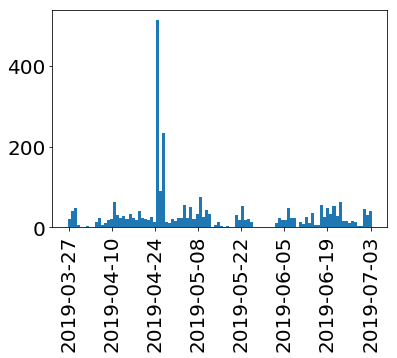

In [ ]:
plt.hist(df_final['startTime'], bins=100)
plt.xticks(rotation=90)
plt.show()

In [ ]:
#get the temperatures into a pandas dataframe
tempVec = []
timeFormatTemp = "%Y-%m-%d %H:%M:%S.%f" # 2018-05-12 09:51:38.169989 |
import time
import calendar

with open(file_temperatures) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter='|')
    line_count = 0
    for row in csv_reader:
        if(not('calo' in row[1])):
            continue
        try:
            caloNum = int((row[1].split("calo"))[1].split('temps')[0])
            #print(caloNum)
            ding = []
            for x in row[2][1:-1].split(','):
                if float(x) > 0 and float(x) < 100:
                    ding.append(float(x))
                else:
                    ding.append(float('nan'))

            vec = [caloNum, ding, np.nanmean(ding),
                            time.strptime(row[3], timeFormatTemp),
                            row[3],
                            calendar.timegm(time.strptime(row[3], timeFormatTemp)) ]
            for x in ding:
                #print(x)
                vec.append(float(x))
            tempVec.append(vec)
        except:
            print("ERROR: ", row)

            line_count += 1
            if(line_count > 50):
                break


print("Creating dataframe")

temperatures = pandas.DataFrame(tempVec, columns=['calo','temps','avgtemp','timefull','timestring','time','xtal0', 'xtal1', 'xtal2', 'xtal3',
                                        'xtal4', 'xtal5', 'xtal6', 'xtal7', 'xtal8', 'xtal9', 'xtal10', 'xtal11', 'xtal12', 'xtal13',
                                        'xtal14', 'xtal15', 'xtal16', 'xtal17', 'xtal18', 'xtal19', 'xtal20', 'xtal21', 'xtal22',
                                        'xtal23', 'xtal24', 'xtal25', 'xtal26', 'xtal27', 'xtal28', 'xtal29', 'xtal30', 'xtal31',
                                        'xtal32', 'xtal33', 'xtal34', 'xtal35', 'xtal36', 'xtal37', 'xtal38', 'xtal39', 'xtal40',
                                        'xtal41', 'xtal42', 'xtal43', 'xtal44', 'xtal45', 'xtal46', 'xtal47', 'xtal48', 'xtal49',
                                        'xtal50', 'xtal51', 'xtal52', 'xtal53'])


temperatures.timefull = pandas.to_datetime(temperatures.timestring)

In [ ]:
temperatures.head()

In [ ]:
tempVec = []
caloTempVec = [[] for i in range(24)]
for i, entry in df_final.iterrows():
    #if(i > 10):
    #    break
    dfi = temperatures.loc[temperatures['timefull'] > entry['startTime']].loc[temperatures['timefull'] < entry['stopTime']]
    #print(entry['run'], dfi['avgtemp'].mean())
    tempVec.append( dfi['avgtemp'].mean() )
    for calo in range(1,25):
        dfii = dfi.loc[dfi['calo'] == calo]
        caloTempVec[calo-1].append( dfii['avgtemp'].mean() )
    
df_final['AvgTemp_AllCalos'] = tempVec
for calo in range(1,25):
    df_final['AvgTemp_Calo'+str(calo)] = caloTempVec[calo -1]
df_final.head()

In [ ]:
df_final.head()

In [ ]:
df_final.to_csv("./run2Trends_4.csv",index=None, header=True)

In [ ]:
plt.plot(runTimes['nBytes'])

In [ ]:
header = [ 'gm2_offline_release' , 'gm2_online_release' , 'run_number' , 'subrun_number' , 'start_event_number' , 'end_event_number'
          , 'filesize' ,        'process_date'        ,     'local_location'     , 'midas_filesize' ,      'midas_file_date'       
          , 'total_art_event' , 'passed_art_event' , 'failed_art_event' , 'exit_status' , 'midas_location' , 'midas_experiment' , 
          'nearline_ctag' , 'serial_id' , 'gpu_ctag' , 't0_tubea_total_integral' , 'ibms1x_centroid' , 'ibms1y_centroid' , 'ibms2x_centroid' ,
          'ibms2y_centroid' , 't0_tubeb_total_integral' , 't0_sipm_total_integral' , 'total_calo_islands' , 'ibms1x_total_integral' , 
          'ibms1y_total_integral' , 'ibms2x_total_integral' , 'ibms2y_total_integral' , 'correctedfordrift' , 'ctag_correction_factor' ]
print(header)

In [ ]:
#get the run times into a pandas dataframe
ctags = pandas.read_csv(file_ctags, delimiter="|", header=None)
ctags.columns = header
ctags.sort_values(by=['run_number'])

ctags.head()

In [ ]:
plt.plot(ctags['run_number'],ctags['nearline_ctag'])
plt.show()

In [ ]:
vec_ctags_byRun = []
ctagCounter = 0
eventCounter = 0
runNumber = -1
subRunCounter = 0
for i, entry in ctags.iterrows():
    if(entry['nearline_ctag'] < 1):
        continue
    if(runNumber != entry['run_number'] and runNumber > 0):
        if(eventCounter > 0):
            vec_ctags_byRun.append( (runNumber, ctagCounter, ctagCounter/eventCounter, subRunCounter) )
        ctagCounter = 0
        eventCounter = 0
        runNumber = -1
        subRunCounter = 0
    runNumber = entry['run_number']
    ctagCounter += entry['nearline_ctag']
    eventCounter += entry['passed_art_event']
    subRunCounter += 1
    #print(entry)

In [ ]:
print(vec_ctags_byRun[:10])

In [ ]:
ctags_byRun = pandas.DataFrame(vec_ctags_byRun,columns=['run', 'totalCtag', 'ctagPerFill', 'subruns'])
ctags_byRun.loc[ctags_byRun['totalCtag'] > 0].loc[ctags_byRun['subruns'] > 30].describe()

In [ ]:
plt.plot(ctags_byRun['run'].loc[ctags_byRun['totalCtag'] > 0].loc[ctags_byRun['subruns'] > 30], 
         ctags_byRun['ctagPerFill'].loc[ctags_byRun['totalCtag'] > 0].loc[ctags_byRun['subruns'] > 30],".")
plt.show()

In [ ]:
plt.hist(ctags_byRun['subruns'],bins=100)
plt.show()

In [ ]:
ctagVec = []
ctagPerFillVec = []
nSubrunsVec = []
for i, entry in df_final.iterrows():
    #if(i > 10):
    #    break
    dfi = ctags_byRun.loc[ctags_byRun['run'] == entry['run']]
    #print(entry['run'], dfi['avgtemp'].mean())
    ctagVec.append( dfi['totalCtag'].mean() )
    ctagPerFillVec.append( dfi['ctagPerFill'].mean() )
    nSubrunsVec.append( dfi['subruns'].mean() )
    
df_final['ctag'] = ctagVec
df_final['ctagPerFill'] = ctagPerFillVec
df_final['nSubRuns'] = nSubrunsVec
df_final.head()

---

In [ ]:
vec_nearlineConstants = []
with open(file_nearlineConstants) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter='|')
    line_count = 0
    for row in csv_reader:
        line_count += 1
        #if(line_count > 2):
        #    break
        #print(row)
        run = row[0]
        calo = row[2]
        gains = [float(x) for x in row[3][1:-1].split(',')]
        mean_gain = np.mean(gains)
        #print(mean_gain, gains)
        vec_nearlineConstants.append([int(run),int(calo),float(mean_gain)])
#print(vec_nearlineConstants)

In [ ]:
nearlineConstants = pandas.DataFrame(vec_nearlineConstants, columns=['run','calo','mean_gain'])

In [ ]:
nearlineConstants.head()

In [ ]:
nearlineConstants.loc[nearlineConstants['run'] == 26571]

In [ ]:
plt.plot(nearlineConstants['run'], nearlineConstants['mean_gain'])
plt.show()

In [ ]:
tempVec = [[] for i in range(1,25)]
for i, entry in df_final.iterrows():
    #if(i > 10):
    #    break
    dfi = nearlineConstants.loc[nearlineConstants['run'] == entry['run']]
    for calo in range(1,25):
        dfii = dfi.loc[dfi['calo'] == calo]
        tempVec[calo-1].append( dfii['mean_gain'].mean() )
    
for calo in range(1,25):
    df_final['AvgGain_Calo'+str(calo)] = tempVec[calo-1]
df_final.head()

---

In [ ]:
markRuns = pandas.read_csv("./data/run2_ml.csv")
markRuns.head()

In [ ]:
runType = []
duration = []
dqmCtagPerFill = []
nlCtagPerFill_Mark = []
nlFrac_Mark = []

for i, entry in df_final.iterrows():
    dfi = markRuns.loc[markRuns['Run'] == entry['run']]

    if(dfi['Run'].values.size > 0):
        runType.append( dfi[markRuns.keys()[1]].values[0] )
    else:
        runType.append( 'X' )
    duration.append( dfi[markRuns.keys()[4]].mean() )
    dqmCtagPerFill.append( dfi[markRuns.keys()[6]].mean() )
    nlCtagPerFill_Mark.append( dfi[markRuns.keys()[7]].mean() )
    nlFrac_Mark.append( dfi[markRuns.keys()[8]].mean() )
    
df_final['runType'] = runType
df_final['duration'] = duration
df_final['dqmCtagPerFill'] = dqmCtagPerFill
df_final['nlCtagPerFill_Mark'] = nlCtagPerFill_Mark
df_final['nlFrac_Mark'] = nlFrac_Mark

df_final.head()

In [ ]:
df_final.loc[df_final['run'] == 25603]

In [ ]:
markRuns.loc[markRuns['Run'] == 25603]

---
### T0 Metrics from hannah

In [ ]:
t0metrics = pandas.read_csv("./data/T0metrics.tsv", delimiter="\t")

In [ ]:
t0metrics.loc[t0metrics['run'] == 26765]

In [ ]:
beamIntegral = []
beamTime = []
beamRMS = []
syncIntegral = []
syncTime = []
ctags = []
ctagsOverT0 = []

for i, entry in df_final.iterrows():
    dfi = t0metrics.loc[t0metrics['run'] == entry['run']]
    
    beamIntegral.append( dfi[t0metrics.keys()[1]].mean() )
    beamTime.append( dfi[t0metrics.keys()[2]].mean() )
    beamRMS.append( dfi[t0metrics.keys()[3]].mean() )
    syncIntegral.append( dfi[t0metrics.keys()[4]].mean() )
    syncTime.append( dfi[t0metrics.keys()[5]].mean() )
    ctags.append( dfi[t0metrics.keys()[6]].mean() )
    ctagsOverT0.append( dfi[t0metrics.keys()[7]].mean() )
    
df_final['beamIntegral'] = beamIntegral
df_final['beamTime'] = beamTime
df_final['beamRMS'] = beamRMS
df_final['syncIntegral'] = syncIntegral
df_final['syncTime'] = syncTime
df_final['ctagsHannah'] = ctags
df_final['ctagsOverT0'] = ctagsOverT0

df_final.head()

In [ ]:
df_final.to_csv("./run2Trends_5.csv",index=None, header=True)

---
### Tracker y-position

In [ ]:
trackery = pandas.read_csv("./data/trackerVerticalPos.tsv", delimiter="\t")

In [ ]:
trackery.head()

In [ ]:
trackerypos = []

for i, entry in df_final.iterrows():
    dfi = trackery.loc[trackery['runs'] == entry['run']]
    
    trackerypos.append( dfi[trackery.keys()[1]].mean() )
    
df_final['trackerY'] = trackerypos

df_final.head()

In [ ]:
df_final.to_csv("./run2Trends_6.csv",index=None, header=True)

---
### Calorimeter positions

In [ ]:
calopos = pandas.read_csv("./data/caloPosRun2_no22.csv")

In [ ]:
calopos.head()

In [ ]:
caloypos = []
caloypos_stdev = []

for i, entry in df_final.iterrows():
    dfi = calopos.loc[calopos['RunNum'] == entry['run']]
    
    caloypos.append( dfi[calopos.keys()[1]].mean() )
    caloypos_stdev.append( dfi[calopos.keys()[2]].mean() )
    
df_final['caloYpos'] = caloypos
df_final['caloYpos_stdev'] = caloypos_stdev

df_final.head()

In [ ]:
df_final.to_csv("./run2Trends_7.csv",index=None, header=True)

---

### Number of subruns in each run

In [2]:
runs = [ 28195, 28194, 28193, 28192, 28191, 28190, 28189, 28188, 28187, 28186, 28184, 28183, 28182, 28181, 28180, 28179, 28178, 28177, 28176, 28175, 28174, 28173, 28172, 28171, 28170, 28169, 28168, 28167, 28166, 28165, 28164, 28163, 28160, 28159, 28158, 28157, 28156, 28155, 28154, 28153, 28152, 28151, 28150, 28149, 28148, 28146, 28144, 28142, 28141, 28140, 28139, 28138, 28136, 28135, 28134, 28133, 28132, 28131, 28130, 28129, 28128, 28127, 28126, 28125, 28124, 28123, 28122, 28121, 28120, 28119, 28118, 28117, 28116, 28115, 28114, 28113, 28112, 28111, 28110, 28109, 28108, 28105, 28104, 28103, 28101, 28100, 28099, 28098, 28097, 28096, 28095, 28093, 28092, 28091, 28090, 28089, 28088, 28087, 28086, 28085, 28084, 28083, 28082, 28081, 28080, 28079, 28078, 28077, 28076, 28075, 28074, 28073, 28072, 28071, 28070, 28069, 28068, 28067, 28066, 28065, 28064, 28063, 28062, 28061, 28060, 28059, 28058, 28057, 28056, 28055, 28054, 28053, 28052, 28051, 28050, 28049, 28048, 28047, 28046, 28045, 28044, 28043, 28042, 28040, 28039, 28038, 28036, 28035, 28034, 28033, 28032, 28031, 28030, 28029, 28028, 28027, 28026, 28025, 28024, 28023, 28022, 28021, 28020, 28019, 28018, 28017, 28016, 28015, 28014, 28013, 28012, 28011, 28010, 28009, 28008, 28007, 28006, 28005, 28004, 28003, 28002, 28001, 28000, 27999, 27998, 27995, 27994, 27993, 27990, 27989, 27988, 27987, 27986, 27985, 27984, 27983, 27982, 27981, 27980, 27979, 27978, 27977, 27976, 27975, 27974, 27973, 27972, 27971, 27970, 27969, 27968, 27967, 27966, 27965, 27964, 27962, 27961, 27959, 27958, 27957, 27956, 27955, 27954, 27953, 27952, 27951, 27950, 27949, 27948, 27947, 27945, 27944, 27943, 27942, 27941, 27940, 27939, 27938, 27937, 27936, 27935, 27934, 27933, 27932, 27931, 27930, 27929, 27928, 27927, 27926, 27925, 27924, 27923, 27922, 27921, 27920, 27919, 27918, 27917, 27916, 27915, 27914, 27913, 27912, 27911, 27910, 27909, 27908, 27907, 27906, 27905, 27904, 27903, 27902, 27901, 27900, 27899, 27898, 27897, 27896, 27895, 27894, 27893, 27892, 27891, 27890, 27889, 27888, 27887, 27886, 27885, 27884, 27883, 27882, 27881, 27879, 27878, 27875, 27874, 27873, 27872, 27871, 27870, 27869, 27867, 27866, 27865, 27864, 27863, 27855, 27853, 27852, 27851, 27850, 27849, 27848, 27847, 27846, 27845, 27844, 27843, 27842, 27841, 27840, 27839, 27837, 27836, 27834, 27833, 27832, 27831, 27830, 27827, 27826, 27825, 27824, 27823, 27822, 27820, 27819, 27818, 27817, 27816, 27815, 27814, 27813, 27812, 27811, 27810, 27809, 27807, 27806, 27803, 27801, 27800, 27799, 27798, 27797, 27796, 27795, 27794, 27793, 27792, 27791, 27790, 27789, 27788, 27787, 27786, 27785, 27784, 27783, 27782, 27781, 27780, 27779, 27778, 27777, 27770, 27768, 27767, 27766, 27765, 27764, 27763, 27762, 27761, 27760, 27759, 27758, 27757, 27756, 27754, 27753, 27752, 27751, 27750, 27749, 27748, 27747, 27746, 27745, 27744, 27743, 27742, 27741, 27740, 27739, 27738, 27737, 27736, 27735, 27734, 27733, 27732, 27731, 27730, 27728, 27727, 27726, 27725, 27724, 27723, 27722, 27721, 27720, 27719, 27718, 27717, 27716, 27715, 27714, 27713, 27712, 27711, 27709, 27708, 27707, 27706, 27705, 27704, 27703, 27702, 27701, 27700, 27699, 27698, 27697, 27696, 27695, 27694, 27692, 27691, 27690, 27689, 27688, 27687, 27686, 27685, 27684, 27683, 27682, 27681, 27680, 27679, 27678, 27677, 27676, 27675, 27674, 27673, 27672, 27671, 27670, 27669, 27668, 27667, 27666, 27665, 27664, 27662, 27661, 27660, 27659, 27658, 27657, 27656, 27655, 27654, 27652, 27651, 27649, 27648, 27647, 27646, 27645, 27644, 27643, 27642, 27641, 27640, 27639, 27638, 27637, 27636, 27635, 27634, 27633, 27632, 27631, 27630, 27629, 27628, 27627, 27626, 27624, 27623, 27622, 27621, 27620, 27619, 27618, 27617, 27616, 27615, 27614, 27613, 27612, 27611, 27610, 27609, 27608, 27607, 27606, 27605, 27603, 27602, 27601, 27600, 27599, 27597, 27596, 27595, 27593, 27592, 27591, 27590, 27589, 27588, 27587, 27586, 27585, 27584, 27583, 27582, 27581, 27579, 27578, 27577, 27576, 27575, 27574, 27573, 27571, 27569, 27568, 27567, 27566, 27564, 27561, 27562, 27560, 27558, 27556, 27554, 27552, 27547, 27546, 27543, 26765, 27542, 27541, 27540, 27539, 27538, 27537, 27536, 27535, 27533, 27532, 27531, 27530, 27529, 27528, 27527, 27526, 27525, 27524, 27523, 27522, 27521, 27520, 27518, 27517, 27516, 27515, 27514, 27513, 27512, 27511, 27510, 27509, 27507, 27508, 27506, 27505, 27504, 27503, 27502, 27501, 27500, 27497, 27499, 27498, 27496, 27495, 27494, 27493, 27492, 27491, 27490, 27489, 27488, 27487, 27486, 27485, 27484, 27483, 27482, 27481, 27480, 27478, 27477, 27476, 27474, 27473, 27472, 27471, 27470, 27469, 27468, 27467, 27466, 27465, 27464, 27463, 27462, 27461, 27460, 27459, 27458, 27457, 27456, 27455, 27454, 27453, 27452, 27451, 27450, 27449, 27448, 27447, 27446, 27445, 27444, 27443, 27442, 27441, 27440, 27439, 27437, 27436, 27435, 27434, 27433, 27432, 27431, 27430, 27429, 27428, 27427, 27426, 27425, 27424, 27423, 27422, 27421, 27420, 27419, 27418, 27417, 27416, 27415, 27414, 27413, 27412, 27411, 27410, 27408, 27407, 27406, 27405, 27404, 27403, 27402, 27401, 27400, 27399, 27398, 27397, 27396, 27395, 27394, 27393, 27392, 27391, 27390, 27389, 27388, 27387, 27386, 27385, 27384, 27383, 27382, 27381, 27380, 27379, 27378, 27377, 27376, 27375, 27374, 27373, 27372, 27371, 27370, 27369, 27368, 27366, 27365, 27364, 27363, 27362, 27361, 27360, 27359, 27358, 27357, 27356, 27355, 27353, 27352, 27351, 27350, 27349, 27348, 27347, 27346, 27345, 27343, 27342, 27341, 27340, 27339, 27337, 27336, 27335, 27334, 27333, 27332, 27331, 27329, 27327, 27326, 27325, 27324, 27323, 27322, 27321, 27320, 27319, 27318, 27317, 27316, 27315, 27314, 27313, 27312, 27311, 27309, 27310, 27308, 27306, 27305, 27304, 27303, 27299, 27298, 27297, 27296, 27293, 27291, 27286, 27285, 27284, 27283, 27282, 27281, 27280, 27279, 27278, 27277, 27276, 27275, 27273, 27271, 27270, 27269, 27268, 27267, 27266, 27265, 27264, 27263, 27262, 27261, 27260, 27259, 27258, 27257, 27256, 27255, 27254, 27253, 27252, 27251, 27250, 27249, 27248, 27247, 27246, 27245, 27244, 27243, 27242, 27241, 27240, 27239, 27238, 27237, 27236, 27235, 27234, 27233, 27232, 27230, 27227, 27226, 27225, 27224, 27223, 27222, 27221, 27220, 27219, 27218, 27217, 27216, 27215, 27213, 27212, 27211, 27210, 27207, 27209, 27208, 27206, 27205, 27204, 27203, 27202, 27201, 27198, 27197, 27195, 27196, 27194, 27193, 27192, 27191, 27190, 27189, 27188, 27187, 27186, 27185, 27184, 27183, 27182, 27181, 27180, 27179, 27178, 27177, 27176, 27175, 27174, 27173, 27172, 27171, 27170, 27169, 27168, 27167, 27166, 27165, 27164, 27163, 27162, 27161, 27160, 27159, 27158, 27157, 27156, 27155, 27154, 27153, 27152, 27151, 27150, 27149, 27148, 27147, 27146, 27145, 27144, 27143, 27142, 27141, 27140, 27139, 27138, 27137, 27136, 27135, 27134, 27133, 27132, 27131, 27130, 27129, 27128, 27127, 27126, 27125, 27124, 27123, 27122, 27121, 27120, 27119, 27117, 27116, 27115, 27114, 27113, 27112, 27111, 27110, 27109, 27108, 27107, 27106, 27105, 27104, 27103, 27102, 27101, 27100, 27099, 27098, 27097, 27096, 27094, 27093, 27092, 27091, 27090, 27089, 27088, 27087, 27086, 27084, 27085, 27083, 27082, 27081, 27080, 27079, 27078, 27077, 27076, 27075, 27074, 27073, 27072, 27071, 27070, 27069, 27068, 27067, 27066, 27065, 27064, 27063, 27062, 27061, 27060, 27059, 27058, 27057, 27056, 27055, 27054, 27053, 27052, 27051, 27050, 27049, 27048, 27047, 27046, 27045, 27044, 27043, 27042, 27041, 27040, 27039, 27036, 27035, 27034, 27032, 27030, 27029, 27028, 27026, 27024, 27023, 27022, 27021, 27019, 27018, 27016, 27015, 27014, 27013, 27012, 27011, 27009, 27008, 27007, 27006, 27005, 27003, 27001, 27000, 26999, 26996, 26995, 26994, 26993, 26992, 26991, 26990, 26989, 26988, 26986, 26985, 26984, 26983, 26982, 26981, 26980, 26979, 26978, 26977, 26976, 26975, 26974, 26973, 26972, 26971, 26970, 26969, 26968, 26967, 26966, 26965, 26964, 26963, 26962, 26961, 26960, 26959, 26958, 26957, 26956, 26955, 26954, 26952, 26951, 26949, 26947, 26943, 26941, 26940, 26938, 26936, 26934, 26932, 26930, 26928, 26927, 26926, 26924, 26922, 26921, 26920, 26918, 26916, 26913, 26912, 26911, 26910, 26909, 26908, 26907, 26906, 26903, 26902, 26901, 26900, 26899, 26898, 26897, 26896, 26895, 26894, 26893, 26892, 26891, 26890, 26889, 26888, 26887, 26886, 26885, 26884, 26883, 26882, 26881, 26880, 26879, 26878, 26877, 26875, 26874, 26873, 26872, 26871, 26870, 26868, 26867, 26866, 26865, 26864, 26863, 26862, 26861, 26860, 26859, 26858, 26857, 26856, 26855, 26854, 26853, 26852, 26851, 26850, 26849, 26848, 26847, 26846, 26845, 26844, 26843, 26842, 26841, 26839, 26838, 26837, 26836, 26835, 26834, 26833, 26832, 26830, 26829, 26828, 26827, 26826, 26825, 26824, 26823, 26822, 26821, 26820, 26819, 26818, 26817, 26816, 26815, 26814, 26813, 26812, 26811, 26810, 26809, 26808, 26807, 26806, 26804, 26803, 26802, 26801, 26799, 26798, 26797, 26796, 26794, 26793, 26792, 26771, 26788, 26787, 26786, 26784, 26783, 26782, 26781, 26779, 26778, 26777, 26776, 26775, 26774, 26773, 26772, 26770, 26769, 26768, 26766, 26764, 26763, 26762, 26761, 26760, 26759, 26758, 26757, 26755, 26754, 26753, 26752, 26751, 26750, 26749, 26748, 26747, 26746, 26745, 26744, 26743, 26742, 26741, 26740, 26739, 26738, 26737, 26736, 26735, 26734, 26733, 26732, 26731, 26730, 26729, 26728, 26727, 26726, 26725, 26724, 26723, 26722, 26721, 26720, 26719, 26718, 26717, 26716, 26715, 26714, 26713, 26712, 26711, 26710, 26709, 26708, 26707, 26706, 26705, 26704, 26703, 26702, 26700, 26699, 26697, 26696, 26695, 26693, 26692, 26691, 26690, 26689, 26688, 26687, 26686, 26685, 26684, 26683, 26682, 26681, 26680, 26679, 26678, 26676, 26675, 26674, 26673, 26672, 26671, 26670, 26669, 26668, 26667, 26666, 26665, 26664, 26663, 26660, 26659, 26658, 26657, 26656, 26655, 26654, 26653, 26652, 26651, 26650, 26648, 26647, 26646, 26645, 26644, 26642, 26640, 26639, 26637, 26638, 26636, 26635, 26634, 26633, 26627, 26626, 26625, 26624, 26623, 26622, 26619, 26616, 26615, 26614, 26613, 26612, 26611, 26610, 26609, 26608, 26607, 26605, 26604, 26603, 26602, 26601, 26598, 26599, 26597, 26596, 26595, 26594, 26593, 26592, 26591, 26590, 26589, 26588, 26587, 26586, 26585, 26583, 26582, 26581, 26580, 26579, 26578, 26577, 26576, 26575, 26574, 26573, 26572, 26571, 26570, 26569, 26567, 26566, 26565, 26564, 26563, 26562, 26561, 26558, 26557, 26556, 26555, 26554, 26553, 26552, 26551, 26550, 26549, 26548, 26547, 26546, 26545, 26544, 26543, 26542, 26541, 26540, 26539, 26538, 26537, 26536, 26535, 26534, 26533, 26532, 26531, 26530, 26529, 26528, 26527, 26526, 26525, 26524, 26523, 26522, 26521, 26520, 26519, 26518, 26517, 26516, 26514, 26513, 26512, 26511, 26510, 26509, 26508, 26507, 26506, 26505, 26504, 26503, 26502, 26501, 26500, 26499, 26498, 26497, 26496, 26494, 26493, 26492, 26491, 26490, 26488, 26487, 26486, 26484, 26483, 26482, 26478, 26477, 26476, 26475, 26474, 26473, 26472, 26471, 26470, 26469, 26468, 26467, 26466, 26464, 26460, 26459, 26458, 26457, 26456, 26454, 26449, 26448, 26445, 26444, 26443, 26442, 26441, 26438, 26437, 26436, 26432, 26431, 26430, 26429, 26428, 26427, 26426, 26425, 26424, 26423, 26422, 26421, 26392, 26391, 26387, 26386, 26385, 26419, 26418, 26417, 26416, 26415, 26414, 26413, 26412, 26411, 26410, 26409, 26408, 26407, 26406, 26405, 26404, 26403, 26402, 26401, 26400, 26399, 26398, 26397, 26396, 26395, 26394, 26393, 26390, 26389, 26388, 26383, 26384, 26382, 26381, 26380, 26379, 26377, 26376, 26375, 26374, 26373, 26370, 26368, 26367, 26366, 26365, 26364, 26361, 26363, 26362, 26360, 26359, 26358, 26357, 26356, 26355, 26354, 26353, 26352, 26351, 26350, 26349, 26348, 26347, 26346, 26345, 26344, 26343, 26342, 26341, 26340, 26339, 26338, 26337, 26336, 26335, 26334, 26333, 26331, 26330, 26329, 26328, 26327, 26326, 26325, 26324, 26323, 26322, 26321, 26320, 26319, 26318, 26317, 26316, 26315, 26314, 26313, 26308, 26307, 26306, 26305, 26304, 26303, 26302, 26301, 26300, 26299, 26298, 26297, 26296, 26295, 26294, 26292, 26291, 26290, 26289, 26288, 26287, 26286, 26285, 26282, 26281, 26280, 26279, 26277, 26276, 26275, 26274, 26273, 26272, 26271, 26270, 26269, 26268, 26267, 26266, 26265, 26264, 26263, 26262, 26261, 26260, 26259, 26258, 26257, 26256, 26255, 26254, 26253, 26252, 26251, 26250, 26249, 26248, 26247, 26246, 26245, 26244, 26243, 26242, 26241, 26240, 26239, 26238, 26236, 26235, 26234, 26233, 26232, 26231, 26230, 26229, 26224, 26228, 26227, 26226, 26225, 26223, 26222, 26221, 26220, 26219, 26218, 26217, 26216, 26215, 26214, 26213, 26212, 26211, 26210, 26209, 26208, 26207, 26206, 26205, 26204, 26203, 26201, 26199, 26198, 26197, 26196, 26195, 26194, 26193, 26192, 26191, 26190, 26189, 26187, 26186, 26185, 26181, 26180, 26179, 26178, 26177, 26176, 26175, 26174, 26173, 26172, 26171, 26170, 26169, 26168, 26167, 26166, 26165, 26160, 26159, 26158, 26157, 26156, 26155, 26154, 26153, 26150, 26152, 26151, 26149, 26148, 26147, 26144, 26146, 26145, 26143, 26142, 26141, 26140, 26139, 26138, 26137, 26136, 26135, 26134, 26133, 26132, 26131, 26130, 26129, 26128, 26127, 26126, 26125, 26124, 26123, 26122, 26121, 26120, 26119, 26118, 26117, 26116, 26115, 26114, 26113, 26112, 26111, 26110, 26109, 26108, 26107, 26106, 26105, 26101, 26100, 26099, 26098, 26097, 26096, 26095, 26094, 26092, 26091, 26090, 26089, 26088, 26087, 26086, 26085, 26084, 26083, 26082, 26081, 26080, 26079, 26078, 26076, 26074, 26073, 26072, 26071, 26070, 26067, 26066, 26065, 26064, 26058, 26062, 26061, 26059, 26055, 26054, 26053, 26052, 26051, 26050, 26049, 26048, 26047, 26046, 26045, 26044, 26043, 26042, 26041, 26040, 26039, 26038, 26037, 26036, 26035, 26034, 26033, 26032, 26031, 26030, 26029, 26028, 26027, 26026, 26025, 26024, 26023, 26022, 26021, 26020, 26019, 26018, 26017, 26016, 26015, 26014, 26013, 26012, 26011, 26010, 26009, 26006, 26005, 26004, 26003, 26002, 26001, 26000, 25999, 25998, 25997, 25996, 25995, 25994, 25992, 25991, 25990, 25989, 25988, 25987, 25986, 25985, 25984, 25983, 25982, 25981, 25980, 25979, 25978, 25977, 25976, 25975, 25974, 25973, 25972, 25971, 25970, 25969, 25968, 25967, 25965, 25964, 25963, 25962, 25961, 25960, 25959, 25958, 25957, 25956, 25955, 25954, 25953, 25952, 25951, 25950, 25949, 25948, 25947, 25946, 25941, 25940, 25939, 25938, 25937, 25936, 25935, 25934, 25933, 25932, 25931, 25930, 25929, 25928, 25927, 25926, 25925, 25920, 25923, 25922, 25921, 25919, 25918, 25917, 25916, 25915, 25914, 25913, 25912, 25911, 25910, 25909, 25908, 25907, 25906, 25905, 25904, 25903, 25902, 25901, 25900, 25899, 25898, 25897, 25896, 25895, 25894, 25893, 25892, 25891, 25890, 25889, 25888, 25887, 25886, 25885, 25884, 25883, 25882, 25881, 25880, 25879, 25878, 25877, 25876, 25875, 25874, 25873, 25872, 25871, 25870, 25869, 25868, 25867, 25866, 25865, 25864, 25863, 25862, 25861, 25860, 25859, 25858, 25857, 25856, 25855, 25854, 25853, 25852, 25851, 25850, 25849, 25848, 25847, 25846, 25845, 25844, 25843, 25842, 25841, 25840, 25839, 25838, 25837, 25836, 25835, 25834, 25833, 25831, 25830, 25829, 25828, 25827, 25826, 25825, 25824, 25823, 25822, 25821, 25820, 25819, 25818, 25817, 25816, 25815, 25814, 25813, 25812, 25811, 25810, 25808, 25807, 25806, 25805, 25804, 25803, 25802, 25801, 25800, 25799, 25798, 25797, 25796, 25795, 25794, 25793, 25792, 25791, 25790, 25789, 25788, 25787, 25786, 25785, 25784, 25783, 25782, 25781, 25780, 25779, 25778, 25777, 25776, 25775, 25774, 25773, 25772, 25771, 25769, 25768, 25767, 25766, 25765, 25764, 25763, 25762, 25761, 25760, 25759, 25758, 25757, 25756, 25755, 25754, 25753, 25752, 25751, 25750, 25749, 25748, 25747, 25746, 25745, 25744, 25743, 25742, 25741, 25740, 25739, 25738, 25737, 25736, 25735, 25734, 25733, 25732, 25731, 25730, 25729, 25728, 25727, 25726, 25725, 25724, 25723, 25722, 25721, 25720, 25719, 25718, 25717, 25716, 25715, 25714, 25713, 25712, 25711, 25710, 25709, 25708, 25707, 25706, 25705, 25704, 25703, 25702, 25701, 25700, 25699, 25698, 25697, 25696, 25695, 25694, 25693, 25692, 25691, 25690, 25689, 25688, 25687, 25686, 25685, 25684, 25683, 25682, 25681, 25680, 25679, 25678, 25677, 25676, 25675, 25674, 25673, 25672, 25671, 25670, 25669, 25668, 25667, 25666, 25665, 25664, 25663, 25662, 25660, 25659, 25658, 25657, 25656, 25655, 25654, 25653, 25651, 25650, 25649, 25648, 25647, 25646, 25645, 25644, 25643, 25642, 25641, 25640, 25639, 25638, 25637, 25636, 25635, 25634, 25633, 25632, 25631, 25630, 25629, 25628, 25627, 25626, 25625, 25624, 25623, 25622, 25621, 25620, 25619, 25618, 25617, 25616, 25615, 25614, 25613, 25612, 25611, 25610, 25609, 25608, 25607, 25606, 25605, 25604, 25603, 25602, 25601, 25600, 25599, 25598, 25597, 25596, 25595, 25594, 25593, 25592, 25591, 25590, 25589, 25588, 25587, 25586, 25585, 25584, 25583, 25582, 25581, 25580, 25579, 25578, 25577, 25576, 25575, 25574, 25573, 25572, 25569, 25568, 25567, 25566, 25565, 25564, 25563, 25562, 25561, 25560, 25559, 25558, 25557, 25556, 25555, 25554, 25553, 25552, 25551, 25550, 25549, 25548, 25547, 25545, 25544, 25543, 25542, 25540, 25539, 25538, 25537, 25536, 25535, 25534, 25533, 25532, 25531, 25530, 25529, 25528, 25527, 25526, 25525, 25524, 25523, 25522, 25521, 25520, 25519, 25518, 25517, 25516, 25515, 25514, 25513, 25512, 25511, 25510, 25509, 25508, 25507, 25506, 25505, 25504, 25503, 25502, 25501, 25500, 25499, 25498, 25497, 25496, 25495, 25494, 25493, 25492, 25491, 25490, 25489, 25488, 25487, 25486, 25485, 25484, 25483, 25482, 25481, 25480, 25479, 25478, 25477, 25476, 25475, 25474, 25473, 25472, 25471, 25470, 25469, 25468, 25467, 25466, 25465, 25464, 25463, 25462, 25461, 25460, 25459, 25458, 25457, 25456, 25455, 25454, 25453, 25452, 25451, 25450, 25449, 25448, 25447, 25446, 25445, 25444, 25443, 25442, 25441, 25440, 25439, 25438, 25437, 25436, 25435, 25434, 25433, 25432, 25431, 25430, 25429, 25428, 25427, 25426, 25425, 25424, 25423, 25422, 25421, 25420, 25419, 25418, 25417, 25416, 25415, 25414, 25413, 25412, 25411, 25410, 25409, 25408, 25407, 25406, 25405, 25404, 25403, 25402, 25401, 25400, 25399, 25397, 25396, 25395, 25394, 25393, 25392, 25391, 25390, 25389, 25388, 25387, 25386, 25385, 25384, 25383, 25382, 25381, 25380, 25379, 25378, 25377, 25375, 25374, 25373, 25372, 25371, 25370, 25369, 25368, 25367, 25366, 25365, 25364, 25363, 25362, 25361, 25360, 25359, 25358, 25357, 25356, 25355, 25354, 25353, 25352, 25351, 25350, 25349, 25348, 25347, 25346, 25344, 25343, 25341, 25340, 25339, 25338, 25337, 25336, 25335, 25334, 25333, 25332, 25331, 25330, 25329, 25328, 25327, 25326, 25325, 25324, 25323, 25322, 25321, 25320, 25319, 25318, 25317, 25316, 25315, 25314, 25313, 25312, 25311, 25310, 25309, 25308, 25307, 25306, 25305, 25304, 25303, 25302, 25301, 25300, 25299, 25298, 25297, 25296, 25295, 25294, 25293, 25292, 25291, 25290, 25289, 25288, 25287, 25286, 25285, 25284, 25282, 25281, 25280, 25279, 25278, 25277, 25276, 25275, 25274, 25273, 25272, 25271, 25270, 25269, 25268, 25267, 25266, 25265, 25264, 25263, 25262, 25261, 25260, 25259, 25258, 25257, 25256, 25255, 25254, 25253, 25252, 25251, 25250, 25249, 25248, 25247, 25246, 25245, 25244, 25243, 25242, 25241, 25240, 25239, 25238, 25237, 25236, 25235, 25234, 25233, 25232, 25231, 25230, 25229, 25228, 25227, 25226, 25225, 25223, 25222, 25221, 25219, 25218, 25217, 25216, 25215, 25214, 25212, 25211, 25210, 25209, 25208, 25207, 25206, 25205, 25204, 25203, 25202, 25201, 25200, 25199, 25198, 25197, 25196, 25195, 25194, 25193, 25192, 25191, 25190, 25189, 25188, 25187, 25186, 25185, 25184, 25183, 25182, 25181, 25180, 25179, 25178, 25177, 25176, 25175, 25174, 25173, 25172, 25171, 25170, 25169, 25168, 25167, 25166, 25165, 25164, 25163, 25162, 25161, 25160, 25159, 25158, 25157, 25156, 25155, 25154, 25153, 25152, 25151, 25150, 25149, 25148, 25147, 25146, 25145, 25144, 25143, 25142, 25141, 25140, 25139, 25138, 25137, 25136, 25135, 25134, 25133, 25132, 25131, 25130, 25129, 25128, 25127, 25126, 25125, 25124, 25123, 25122, 25121, 25120, 25119, 25118, 25117, 25116, 25115, 25114, 25113, 25112, 25111, 25110, 25109, 25108, 25107, 25106, 25105, 25104, 25103, 25102, 25101, 25100, 25099, 25098, 25097, 25096, 25095, 25094, 25093, 25092, 25091, 25090, 25089, 25088, 25087, 25086, 25085, 25084, 25083, 25082, 25081, 25080, 25079, 25078, 25077, 25076, 25075, 25074, 25073, 25072, 25071, 25070, 25069, 25068, 25067, 25066, 25065, 25064, 25063, 25062, 25061, 25060, 25059, 25058, 25057, 25056, 25055, 25054, 25053, 25052, 25051, 25050, 25049, 25048, 25047, 25046, 25045, 25044, 25043, 25041, 25040, 25039, 25038, 25037, 25036, 25035, 25034, 25033, 25032, 25031, 25030, 25029, 25028, 25027, 25026, 25025, 25024, 25023, 25022, 25021, 25020, 25019, 25017, 25015, 25014, 25013, 25012, 25011, 25010, 25009, 25008, 25007, 25006, 25005, 25004, 25003, 25002, 25001, 25000, 24999, 24998, 24997, 24995, 24993, 24992, 24990, 24989, 24988, 24987, 24986, 24985, 24984, 24983, 24982, 24981, 24980, 24979, 24978, 24977, 24976, 24975, 24974, 24973, 24972, 24971, 24970, 24969, 24968, 24967, 24966, 24965, 24964, 24963, 24962, 24961, 24960, 24958, 24957, 24956, 24955, 24953, 24952, 24951, 24948, 24949, 24947, 24946, 24945, 24943, 24942, 24941, 24940, 24939, 24938, 24937, 24936, 24935, 24934, 24933, 24932, 24930, 24929, 24928, 24927, 24926, 24925, 24924, 24923, 24922, 24921, 24920, 24919, 24918, 24917, 24916, 24915, 24914, 24913, 24912, 24910, 24909, 24908, 24907, 24906, 24905, 24904, 24903, 24902, 24901, 24900, 24899, 24898, 24896, 24895, 24894, 24893, 24892, 24891, 24890, 24889, 24887, 24888, 24886, 24885, 24884, 24883, 24881, 24880, 24879, 24878, 24877, 24875, 24874, 24873, 24872, 24871, 24870, 24869, 24868, 24867, 24866, 24865, 24863, 24861, 24860, 24859, 24858, 24857, 24856, 24855, 24854, 24853, 24852, 24851, 24850, 24849, 24848, 24847, 24846, 24845, 24844, 24843, 24842, 24841, 24840, 24835, 24836, 24834, 24833, 24832, 24831, 24830, 24829, 24828, 24827, 24826, 24825, 24824, 24823, 24822, 24821, 24820, 24819, 24818, 24816, 24814, 24813, 24812, 24811, 24810, 24806, 24805, 24804, 24803, 24802, 24801, 24800, 24799, 24798, 24797, 24796, 24795, 24793, 24792, 24790, 24788, 24787, 24786, 24785, 24784, 24783, 24782, 24780, 24779, 24778, 24777, 24776, 24775, 24774, 24773, 24772, 24770, 24769, 24768, 24767, 24766, 24765, 24764, 24763, 24762, 24760, 24759, 24758, 24756, 24757, 24755, 24754, 24752, 24751, 24750, 24749, 24748, 24747, 24746, 24745, 24744, 24742, 24740, 24739, 24738, 24737, 24736, 24735, 24734, 24733, 24732, 24730, 24729, 24728, 24727, 24726, 24725, 24724, 24723, 24722, 24721, 24720, 24719, 24718, 24717, 24716, 24715, 24714, 24713, 24712, 24711, 24710, 24709, 24708, 24707, 24706, 24705, 24704, 24703, 24702, 24700, 24699, 24698, 24697, 24696, 24695, 24694, 24692, 24691, 24690, 24689, 24688, 24687, 24686, 24685, 24684, 24683, 24682, 24681, 24680, 24679, 24678, 24677, 24676, 24675, 24674, 24673, 24672, 24671, 24670, 24669, 24668, 24667, 24666, 24665, 24664, 24663, 24662, 24661, 24660, 24659, 24658, 24657, 24656, 24655, 24654, 24653, 24652, 24651, 24650, 24649, 24648, 24647, 24646, 24645, 24644, 24643, 24642, 24640, 24639, 24638, 24637, 24636, 24634, 24633, 24632, 24631, 24630, 24628, 24627, 24625, 24622, 24621, 24620, 24619, 24617, 24616, 24614, 24613, 24611, 24609, 24608, 24605, 24604, 24602, 24600, 24598, 24597, 24595, 24594, 24591, 24590, 24589, 24588, 24587, 24584, 24585, 24583, 24582, 24581, 24580, 24579, 24578, 24577, 24576, 24575, 24574, 24573, 24572, 24571, 24570, 24568, 24567, 24565, 24563, 24562, 24561, 24560, 24559, 24557, 24555, 24552, 24551, 24549, 24548, 24547, 24544, 24543, 24542, 24541, 24538, 24537, 24536, 24535, 24534, 24531, 24529, 24528, 24527, 24526, 24525, 24524, 24523, 24522, 24521, 24520, 24519, 24518, 24517, 24516, 24515, 24514, 24513, 24512, 24511, 24510, 24509, 24508, 24507, 24505, 24504, 24503, 24502, 24500, 24499, 24498, 24497, 24496, 24495, 24494, 24493, 24492, 24491, 24490, 24489, 24488, 24487, 24486, 24485, 24484, 24483, 24482, 24481, 24480, 24479, 24478, 24477, 24476, 24475, 24474, 24473, 24472, 24471, 24470, 24469, 24468, 24467, 24466, 24465, 24464, 24463, 24462, 24461, 24458, 24457, 24456, 24453, 24454, 24450, 24449, 24448, 24447, 24446, 24445, 24444, 24442, 24440, 24439, 24438, 24437, 24436, 24435, 24433, 24432, 24431, 24430, 24429, 24428, 24427, 24426, 24425, 24424, 24423, 24422, 24421, 24420, 24419, 24418, 24417, 24416, 24415, 24414, 24413, 24412, 24411, 24410, 24409, 24408, 24407, 24406, 24405, 24404, 24403, 24402, 24401, 24400, 24399, 24398, 24397, 24395, 24396, 24394, 24393, 24392, 24391, 24390, 24389, 24388, 24387, 24386, 24385, 24383, 24382, 24381, 24380, 24379, 24378, 24377, 24376, 24375, 24374, 24373, 24372, 24371, 24370, 24367, 24366, 24365, 24364, 24363, 24362, 24361, 24360, 24359, 24358, 24357, 24356, 24355, 24354, 24353, 24352, 24351, 24350, 24349, 24348, 24347, 24346, 24345, 24344, 24343, 24342, 24341, 24340, 24339, 24338, 24337, 24336, 24335, 24334, 24333, 24332, 24331, 24330, 24329, 24328, 24327, 24326, 24325, 24324, 24323, 24322, 24321, 24320, 24319, 24318, 24317, 24316, 24315, 24314, 24313, 24312, 24311, 24310, 24309, 24308, 24307, 24306, 24305, 24301, 24300, 24299, 24298, 24297, 24296, 24295, 24294, 24293, 24289, 24288, 24287, 24286, 24285, 24284, 24283, 24282, 24281, 24280, 24279, 24278, 24277, 24276, 24275, 24274, 24272, 24273, 24271, 24270, 24269, 24268, 24267, 24266, 24265, 24264, 24263, 24261, 24260, 24259, 24258, 24257, 24256, 24255, 24254, 24253, 24252, 24250, 24249, 24248, 24247, 24246, 24245, 24244, 24243, 24242, 24241, 24239, 24234, 24233, 24232, 24230, 24229, 24228, 24227, 24226, 24225, 24224, 24223, 24222, 24221, 24220, 24219, 24218, 24217, 24216, 24215, 24214, 24213, 24212, 24211, 24210, 24209, 24208, 24207, 24206, 24205, 24204, 24203, 24202, 24201, 24200, 24189, 24188, 24187, 24186, 24185, 24184, 24183, 24182, 24181, 24180, 24179, 24178, 24177, 24176, 24175, 24174, 24173, 24172, 24171, 24170, 24169, 24168, 24167, 24166, 24165, 24164, 24163, 24161, 24160, 24159, 24158, 24157, 24156, 24155, 24154, 24153, 24152, 24151, 24150, 24149, 24148, 24147, 24146, 24145, 24144, 24143, 24142, 24141, 24140, 24139, 24138, 24137, 24136, 24135, 24134, 24133, 24132, 24131, 24130, 24129, 24128, 24127, 24126, 24125, 24124, 24123, 24122, 24121, 24120, 24119, 24118, 24117, 24116, 24115, 24114, 24113, 24112, 24111, 24110, 24109, 24108, 24107, 24106, 24105, 24104, 24103, 24102, 24101, 24100, 24099, 24098, 24097, 24096, 24095, 24094, 24093, 24092, 24091, 24090, 24089, 24088, 24087, 24086, 24085, 24084, 24083, 24082, 24081, 24080, 24079, 24078, 24077, 24076, 24075, 24074, 24073, 24072, 24071, 24070, 24069, 24068, 24067, 24066, 24065, 24064, 24063, 24062, 24061, 24060, 24059, 24058, 24057, 24056, 24055, 24054, 24053, 24052, 24051, 24050, 24049, 24048, 24047, 24046, 24045, 24044, 24043, 24042, 24041, 24040, 24039, 24038, 24037, 24036, 24035, 24034, 24033, 24032, 24031, 24030, 24029, 24028, 24027, 24026, 24025, 24024, 24023, 24022, 24021, 24020, 24019, 24018, 24017, 24016, 24015, 24014, 24013, 24012, 24011, 24010, 24009, 24008, 24007, 24006, 24005, 24004, 24003, 24002, 24001, 24000, 23999, 23998, 23997, 23996, 23995, 23994, 23993, 23992, 23991, 23990, 23989, 23988, 23987, 23986, 23985, 23984, 23983, 23978, 23977, 23976, 23975, 23974, 23973, 23972, 23971, 23970, 23969, 23968, 23967, 23966, 23965, 23964, 23962, 23961, 23959, 23958, 23957, 23956, 23955, 23954, 23952, 23950, 23949, 23948, 23947, 23946, 23945, 23944, 23942, 23941, 23940, 23939, 23938, 23936, 23934, 23935, 23933, 23932, 23931, 23930, 23928, 23927, 23923, 23922, 23920, 23919, 23917, 23916, 23914, 23913, 23912, 23911, 23910, 23909, 23908, 23907, 23906, 23905, 23904, 23903, 23902, 23901, 23900, 23899, 23897, 23896, 23895 ]
nsubruns = [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 491, 491, 491, 491, 491, 492, 492, 491, 491, 491, 491, 491, 491, 491, 491, 491, 491, 492, 495, 495, 276, 29, 11, 0, 0, 0, 0, 0, 0, 0, 0, 35, 1, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 10, 10, 11, 10, 11, 10, 11, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 23, 1, 1, 1, 6, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 0, 0, 0, 144, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 209, 0, 0, 376, 0, 10, 10, 10, 10, 10, 10, 10, 10, 0, 0, 0, 0, 10, 10, 10, 10, 10, 10, 10, 10, 12, 11, 456, 55, 10, 10, 10, 10, 10, 10, 10, 10, 12, 2, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 0, 0, 0, 0, 0, 10, 10, 10, 10, 10, 10, 10, 10, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 95, 10, 10, 10, 10, 10, 10, 10, 10, 66, 1, 1, 1, 4, 0, 0, 0, 0, 0, 0, 0, 139, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 19, 2, 7, 8, 18, 7, 3, 4, 32, 1, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 61, 50, 1, 43, 65, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 262, 499, 499, 1, 4, 11, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 10, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 2, 7, 1, 1, 1, 3, 4, 2, 1, 1, 1, 7, 8, 1, 27, 1, 1, 7, 1, 10, 12, 27, 11, 2, 5, 5, 5, 9, 3, 3, 4, 1, 23, 13, 3, 1, 6, 1, 1, 1, 3, 1, 1, 1, 5, 8, 7, 7, 7, 7, 7, 3, 7, 5, 7, 5, 14, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 4, 1, 1, 4, 2, 3, 2, 2, 1, 1, 2, 1, 1, 1, 1, 3, 2, 1, 5, 4, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 3, 2, 1, 51, 7, 65, 10, 3, 1, 5, 5, 13, 1, 17, 10, 27, 1, 1, 0, 0, 0, 0, 0, 0, 1, 168, 494, 181, 456, 152, 9, 99, 114, 1, 14, 116, 27, 97, 115, 102, 96, 2, 295, 109, 11, 469, 496, 25, 495, 386, 497, 496, 30, 48, 46, 12, 46, 113, 27, 2, 4, 1, 102, 0, 0, 0, 0, 222, 496, 1, 4, 1, 107, 5, 36, 14, 93, 103, 96, 359, 110, 24, 9, 375, 325, 165, 495, 495, 1, 32, 1, 371, 495, 3, 265, 6, 12, 134, 101, 104, 102, 103, 100, 105, 105, 107, 103, 102, 106, 180, 192, 80, 100, 1, 63, 55, 131, 15, 172, 1, 40, 99, 69, 495, 258, 252, 497, 439, 497, 496, 110, 98, 107, 105, 104, 103, 103, 105, 104, 14, 103, 108, 113, 109, 112, 101, 296, 159, 146, 473, 312, 494, 1, 244, 494, 493, 211, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 114, 494, 57, 318, 494, 13, 494, 494, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 439, 4, 404, 498, 498, 498, 498, 113, 1, 83, 410, 168, 1, 391, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1, 1, 2, 8, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 79, 206, 494, 494, 21, 18, 1, 6, 232, 494, 494, 494, 1, 247, 272, 495, 495, 36, 495, 495, 495, 402, 495, 494, 495, 84, 84, 83, 84, 87, 88, 85, 85, 86, 83, 23, 272, 496, 496, 496, 495, 75, 495, 167, 497, 496, 385, 172, 282, 1, 102, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1, 257, 45, 56, 498, 26, 25, 26, 34, 28, 75, 73, 29, 31, 25, 25, 33, 29, 26, 24, 29, 32, 15, 67, 186, 2, 74, 495, 495, 433, 495, 495, 495, 495, 493, 495, 495, 1, 258, 495, 494, 209, 497, 498, 25, 498, 296, 311, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 265, 497, 132, 498, 498, 497, 346, 494, 494, 1, 425, 494, 1, 90, 495, 495, 133, 374, 495, 495, 19, 236, 107, 495, 409, 494, 1, 1, 433, 1, 16, 495, 1, 435, 1, 27, 494, 498, 130, 66, 495, 150, 34, 113, 151, 69, 10, 234, 55, 497, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 127, 497, 4, 496, 497, 497, 496, 1, 214, 1, 87, 496, 496, 496, 1, 91, 497, 496, 1, 4, 42, 496, 496, 10, 10, 10, 10, 10, 10, 10, 7, 10, 1, 2, 3, 107, 5, 2, 8, 1, 3, 1, 2, 21, 8, 12, 10, 9, 15, 11, 21, 2, 32, 1, 7, 26, 6, 1, 46, 1, 26, 16, 1, 58, 7, 32, 460, 4, 16, 6, 1, 7, 7, 6, 2, 5, 49, 5, 1, 5, 3, 6, 2, 18, 5, 1, 31, 18, 61, 17, 466, 362, 17, 22, 45, 1, 79, 159, 12, 1, 480, 13, 10, 29, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 205, 495, 494, 1, 473, 493, 494, 1, 129, 494, 494, 494, 1, 4, 1, 191, 494, 37, 1, 216, 327, 496, 1, 199, 305, 494, 495, 495, 52, 443, 234, 81, 494, 494, 494, 494, 494, 494, 495, 495, 69, 497, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 24, 199, 495, 495, 495, 495, 495, 494, 494, 494, 146, 493, 494, 494, 307, 495, 222, 495, 495, 495, 265, 1, 334, 495, 495, 121, 495, 495, 494, 495, 45, 265, 495, 495, 495, 496, 372, 15, 496, 495, 495, 92, 495, 496, 189, 496, 180, 1, 9, 9, 9, 9, 9, 9, 9, 31, 487, 266, 3, 495, 32, 495, 272, 493, 493, 493, 422, 493, 493, 147, 494, 1, 398, 493, 493, 35, 0, 0, 0, 0, 0, 0, 0, 492, 108, 494, 1, 117, 121, 8, 495, 219, 303, 494, 495, 494, 495, 3, 495, 4, 262, 495, 3, 473, 7, 28, 146, 495, 495, 495, 496, 495, 495, 495, 495, 495, 136, 281, 495, 495, 495, 226, 1, 217, 495, 495, 495, 495, 34, 495, 495, 495, 356, 495, 496, 9, 496, 465, 8, 1, 10, 9, 10, 10, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 199, 203, 497, 496, 1, 219, 496, 3, 497, 497, 496, 2, 458, 27, 497, 497, 497, 357, 497, 496, 497, 148, 496, 162, 495, 496, 495, 495, 496, 482, 496, 239, 495, 495, 495, 1, 223, 495, 495, 1, 104, 306, 495, 143, 152, 494, 493, 495, 10, 10, 10, 10, 10, 10, 10, 162, 70, 1, 290, 2, 15, 3, 278, 495, 1, 162, 497, 495, 231, 0, 0, 265, 1, 77, 1, 20, 69, 2, 4, 1, 3, 1, 1, 1, 10, 10, 10, 10, 64, 0, 0, 0, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 495, 23, 1, 25, 123, 158, 416, 398, 4, 467, 57, 495, 480, 255, 494, 1, 53, 494, 10, 11, 313, 201, 95, 58, 41, 20, 59, 58, 58, 59, 58, 30, 57, 59, 20, 23, 54, 48, 1, 110, 496, 496, 14, 9, 3, 18, 4, 67, 5, 18, 127, 165, 71, 16, 3, 3, 164, 495, 495, 495, 182, 81, 495, 269, 386, 77, 85, 100, 270, 493, 493, 493, 488, 239, 493, 494, 494, 494, 494, 494, 20, 494, 23, 170, 2, 4, 3, 10, 33, 9, 222, 52, 10, 50, 3, 16, 2, 6, 8, 3, 3, 3, 177, 177, 5, 495, 495, 449, 189, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 16, 5, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 258, 495, 79, 495, 495, 20, 254, 68, 495, 495, 1, 206, 34, 154, 59, 59, 495, 293, 25, 494, 493, 61, 6, 63, 57, 57, 56, 59, 56, 29, 63, 90, 40, 255, 496, 495, 21, 404, 495, 495, 495, 495, 495, 494, 152, 495, 358, 495, 413, 282, 421, 1, 381, 126, 495, 495, 391, 495, 1, 5, 397, 214, 214, 494, 1, 7, 457, 494, 1, 136, 495, 76, 5, 183, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 66, 495, 495, 48, 254, 1, 402, 1, 178, 48, 494, 264, 494, 495, 495, 495, 495, 495, 495, 162, 14, 61, 495, 1, 185, 495, 495, 495, 1, 481, 495, 495, 495, 56, 1, 4, 136, 28, 1, 207, 129, 1, 101, 389, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1, 1, 95, 135, 1, 351, 496, 496, 495, 496, 496, 495, 20, 106, 8, 496, 59, 496, 496, 495, 1, 306, 495, 1, 279, 348, 495, 308, 441, 495, 495, 496, 496, 126, 313, 495, 495, 297, 1, 82, 83, 82, 82, 83, 244, 180, 2, 387, 1, 360, 497, 373, 4, 315, 497, 496, 496, 19, 1, 13, 1, 483, 496, 495, 495, 495, 495, 73, 15, 317, 332, 478, 496, 495, 495, 495, 496, 496, 121, 205, 301, 1, 477, 496, 449, 114, 495, 496, 495, 337, 200, 496, 495, 495, 495, 496, 113, 36, 9, 382, 497, 69, 7, 38, 350, 495, 449, 495, 496, 495, 495, 495, 495, 495, 496, 495, 18, 495, 72, 359, 495, 209, 48, 497, 8, 8, 8, 7, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 8, 7, 7, 8, 9, 9, 9, 9, 9, 8, 9, 9, 9, 9, 9, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 2, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 2, 1, 82, 495, 32, 495, 495, 2, 145, 11, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 1, 2, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 55, 308, 496, 495, 343, 495, 495, 495, 429, 495, 137, 496, 495, 218, 495, 420, 495, 495, 495, 495, 495, 445, 269, 495, 260, 188, 494, 240, 1, 12, 100, 59, 3, 4, 495, 229, 495, 495, 3, 496, 495, 59, 383, 495, 495, 496, 496, 495, 1, 225, 1, 19, 349, 380, 495, 495, 496, 496, 496, 496, 389, 496, 136, 496, 496, 496, 34, 336, 132, 496, 495, 369, 496, 40, 177, 496, 496, 497, 497, 497, 224, 70, 497, 229, 1, 111, 497, 496, 496, 55, 496, 49, 3, 128, 409, 496, 496, 496, 139, 496, 496, 496, 1, 1, 1, 1, 496, 496, 188, 135, 496, 1, 216, 261, 257, 495, 12, 13, 33, 35, 42, 2, 1, 12, 26, 21, 22, 22, 21, 104, 3, 176, 37, 102, 31, 39, 9, 4, 299, 377, 495, 496, 496, 495, 495, 495, 36, 495, 495, 491, 73, 424, 495, 495, 222, 348, 69, 495, 495, 496, 496, 9, 2, 210, 496, 55, 496, 393, 69, 496, 218, 495, 495, 495, 495, 495, 495, 183, 308, 180, 495, 1, 206, 495, 286, 496, 7, 496, 40, 120, 496, 3, 1, 304, 496, 78, 82, 5, 116, 109, 102, 74, 96, 95, 96, 158, 294, 498, 367, 176, 20, 32, 1, 17, 1, 63, 335, 232, 496, 496, 496, 252, 496, 149, 316, 496, 496, 1, 242, 231, 54, 496, 128, 496, 151, 496, 496, 122, 496, 496, 85, 108, 145, 496, 254, 496, 95, 496, 1, 79, 87, 10, 4, 6, 95, 493, 493, 369, 0, 1, 358, 371, 11, 474, 495, 493, 185, 493, 494, 101, 494, 494, 310, 98, 3, 400, 493, 494, 494, 127, 494, 9, 166, 163, 371, 71, 497, 497, 315, 498, 467, 1, 176, 1, 9, 278, 351, 497, 497, 497, 275, 497, 5, 497, 13, 121, 14, 341, 370, 1, 48, 72, 77, 72, 121, 101, 2, 4, 143, 373, 497, 318, 5, 299, 267, 102, 310, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 1, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 186, 449, 10, 69, 497, 22, 497, 497, 497, 303, 10, 6, 439, 160, 497, 329, 497, 65, 497, 365, 497, 455, 266, 497, 189, 497, 157, 62, 364, 463, 64, 497, 246, 497, 497, 497, 497, 497, 24, 497, 497, 497, 497, 217, 497, 497, 290, 165, 185, 18, 9, 101, 1, 1, 347, 111, 118, 22, 21, 28, 2, 5, 90, 224, 49, 1, 5, 8, 238, 110, 498, 4, 76, 498, 223, 144, 1, 5, 1, 386, 430, 497, 497, 11, 3, 498, 15, 2, 143, 498, 105, 10, 2, 52, 309, 228, 8, 301, 1, 100, 1, 427, 81, 8, 3, 5, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 35, 3, 2, 3, 6, 1, 119, 294, 194, 497, 165, 497, 4, 292, 497, 497, 497, 81, 344, 134, 204, 497, 497, 497, 497, 497, 482, 67, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 277, 53, 498, 498, 497, 259, 29, 8, 177, 58, 62, 116, 497, 128, 497, 497, 63, 52, 3, 30, 48, 15, 67, 497, 497, 3, 146, 105, 289, 497, 34, 497, 94, 497, 497, 23, 54, 102, 135, 115, 100, 117, 26, 196, 9, 497, 7, 52, 497, 497, 497, 497, 497, 497, 119, 238, 117, 497, 497, 422, 184, 497, 497, 497, 5, 61, 57, 62, 7, 56, 59, 60, 57, 56, 62, 57, 57, 20, 41, 14, 14, 89, 43, 43, 35, 4, 9, 65, 11, 168, 97, 497, 498, 1, 498, 19, 498, 497, 396, 497, 497, 179, 20, 105, 497, 497, 497, 497, 12, 29, 58, 2, 5, 2, 1, 1, 16, 208, 497, 498, 38, 387, 112, 498, 498, 357, 11, 243, 344, 498, 55, 66, 70, 217, 498, 54, 420, 295, 57, 259, 2, 3, 9, 4, 6, 6, 2, 4, 4, 6, 1, 14, 179, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 3, 6, 6, 6, 5, 6, 5, 5, 1, 6, 6, 6, 5, 6, 5, 5, 6, 5, 5, 5, 5, 6, 6, 5, 5, 5, 5, 6, 5, 6, 5, 5, 5, 5, 5, 5, 1, 6, 5, 5, 5, 6, 6, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 433, 103, 80, 233, 498, 328, 219, 341, 498, 134, 467, 163, 70, 38, 367, 406, 1, 288, 213, 312, 25, 128, 27, 240, 149, 100, 180, 498, 2, 51, 43, 498, 38, 1, 1, 1, 315, 498, 16, 1, 1, 1, 1, 1, 1, 6, 382, 268, 141, 29, 1, 233, 498, 150, 230, 242, 314, 80, 11, 21, 6, 187, 1, 1, 1, 1, 8, 23, 37, 491]

In [3]:
print(len(runs), len(nsubruns))

3908 3908


In [5]:
df_final = pandas.read_csv("./run2Trends_7.csv")
df_final.head()

,run,startTime,stopTime,nEvents,quality,AvgTemp_AllCalos,ctag,ctagPerFill,nSubRuns,AvgGain_Calo1,...,beamIntegral,beamTime,beamRMS,syncIntegral,syncTime,ctagsHannah,ctagsOverT0,trackerY,caloYpos,caloYpos_stdev
0,26765,2019-06-07 01:08:49,2019-06-07 02:38:00,124381.0,Y,40.907244,NaN,NaN,NaN,1.327443,...,349129.293357,104908.840928,28.46042,8771.189435,5463.705483,690.045883,0.00197,0.025173,-0.354853,0.002992
1,27485,2019-07-03 11:04:32,2019-07-03 11:06:39,2361.0,Y,42.129770,525772.0,636.527845,7.0,1.694402,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,27484,2019-07-03 09:42:28,2019-07-03 11:03:16,117437.0,T,42.413047,565474.0,186.072392,23.0,1.683126,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,27483,2019-07-03 08:22:08,2019-07-03 09:31:22,102242.0,T,42.347569,12.0,0.006944,12.0,1.677389,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,27482,2019-07-03 07:38:35,2019-07-03 08:14:47,51916.0,T,42.248014,NaN,NaN,NaN,1.674115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
runsToAdd = []
subrunsToAdd = []

for i, entry in df_final.iterrows():
    #if(i > 20):
    #    break
    runi = int(entry['run'])
    foundmatch = False
    for j, runj in enumerate(runs):
        if(runi == runj):
#            print(runi,runj)
            runsToAdd.append(runi)
            subrunsToAdd.append(nsubruns[j])
            foundmatch = True
    if(not foundmatch):
        print("ERROR: Could not match", runi)
        runsToAdd.append(np.nan)
        subrunsToAdd.append(np.nan)
    

In [16]:
df_final['numberOfSubruns'] = subrunsToAdd
df_final.head()

,run,startTime,stopTime,nEvents,quality,AvgTemp_AllCalos,ctag,ctagPerFill,nSubRuns,AvgGain_Calo1,...,beamTime,beamRMS,syncIntegral,syncTime,ctagsHannah,ctagsOverT0,trackerY,caloYpos,caloYpos_stdev,numberOfSubruns
0,26765,2019-06-07 01:08:49,2019-06-07 02:38:00,124381.0,Y,40.907244,NaN,NaN,NaN,1.327443,...,104908.840928,28.46042,8771.189435,5463.705483,690.045883,0.00197,0.025173,-0.354853,0.002992,494
1,27485,2019-07-03 11:04:32,2019-07-03 11:06:39,2361.0,Y,42.129770,525772.0,636.527845,7.0,1.694402,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
2,27484,2019-07-03 09:42:28,2019-07-03 11:03:16,117437.0,T,42.413047,565474.0,186.072392,23.0,1.683126,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,375
3,27483,2019-07-03 08:22:08,2019-07-03 09:31:22,102242.0,T,42.347569,12.0,0.006944,12.0,1.677389,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,325
4,27482,2019-07-03 07:38:35,2019-07-03 08:14:47,51916.0,T,42.248014,NaN,NaN,NaN,1.674115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,165


In [17]:
df_final.to_csv("./run2Trends_8.csv",index=None, header=True)

---

In [5]:
df_final = pandas.read_csv("./run2Trends_8.csv")
df_final.head()

,run,startTime,stopTime,nEvents,quality,AvgTemp_AllCalos,ctag,ctagPerFill,nSubRuns,AvgGain_Calo1,...,beamTime,beamRMS,syncIntegral,syncTime,ctagsHannah,ctagsOverT0,trackerY,caloYpos,caloYpos_stdev,numberOfSubruns
0,26765,2019-06-07 01:08:49,2019-06-07 02:38:00,124381.0,Y,40.907244,NaN,NaN,NaN,1.327443,...,104908.840928,28.46042,8771.189435,5463.705483,690.045883,0.00197,0.025173,-0.354853,0.002992,494
1,27485,2019-07-03 11:04:32,2019-07-03 11:06:39,2361.0,Y,42.129770,525772.0,636.527845,7.0,1.694402,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
2,27484,2019-07-03 09:42:28,2019-07-03 11:03:16,117437.0,T,42.413047,565474.0,186.072392,23.0,1.683126,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,375
3,27483,2019-07-03 08:22:08,2019-07-03 09:31:22,102242.0,T,42.347569,12.0,0.006944,12.0,1.677389,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,325
4,27482,2019-07-03 07:38:35,2019-07-03 08:14:47,51916.0,T,42.248014,NaN,NaN,NaN,1.674115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,165


In [6]:
'''
24375 - 24462 : Mar25-Mar29 : 0.08672 BNL
- quads: 18.3/13.1 kV
- kicker : 142.6 kV [55.3, 52.2, 35.1]

24575 – 27440 : Apr08-Jul02 : 1.82225 BNL
- quads: 18.3/13.1 kV
- kicker : 142.0 kV [47.8, 47.1, 47.1]
'''

kickerQuadSettings = [ # [(runstart, runend), kickerSettings, quadSettings]
    [(24375 , 24462), (142.6, (55.3, 52.2, 35.1)), (18.3,13.1)],
    [(24575 , 27440), (142.0, (47.8, 47.1, 47.1)), (18.3,13.1)]    
]

In [27]:
kTotal = []
k1 = []
k2 = []
k3 = []
q1 = []
q2 = []
runs = []

for i, entry in df_final.iterrows():
    run = entry['run']
    runs.append(run)
    foundMatch = False
    for si in kickerQuadSettings:
        if(run >= si[0][0] and run <= si[0][1]):
            #print("hi")
            foundMatch = True
            kTotal.append( si[1][0] )
            k1.append( si[1][1][0] )
            k2.append( si[1][1][1] )
            k3.append( si[1][1][2] )
            q1.append( si[2][0] )
            q2.append( si[2][1] )
    if(not foundMatch):
        kTotal.append( np.nan )
        k1.append( np.nan)
        k2.append( np.nan )
        k3.append( np.nan )
        q1.append( np.nan )
        q2.append( np.nan )

    

In [28]:
print(len(kTotal), len(runs), df_final['run'].size, len(q1))

2838 2838 2838 2838


In [29]:
df_final['kTotal'] = kTotal
df_final['k1'] = k1
df_final['k2'] = k2
df_final['k3'] = k3
df_final['q1'] = q1
df_final['q2'] = q2

In [30]:
df_final.to_csv("./run2Trends_9.csv",index=None, header=True)

---


In [33]:
wedgeChange = 26659

In [34]:
wedge = []

for i, entry in df_final.iterrows():
    run = entry['run']
    runs.append(run)
    if(run < wedgeChange):
        wedge.append(0)
    else:
        wedge.append(1)

    

In [36]:
print(len(wedge))

2838


In [37]:
df_final['wedgeChange'] = wedge

In [38]:
df_final.to_csv("./run2Trends_10.csv",index=None, header=True)

---

In [64]:
headers = ["id", 'startTime', 'endTime', 'feedbackCurrent_mA', 'feedbackCurrent_var', 'yokeTemp', 'yokeTemp_var',
            'yokeTemp_Gradient', 'yokeTemp_Gradient_var', "none"]

In [65]:
#get the run times into a pandas dataframe
fieldValues = pandas.read_csv("./data/field_50runs.csv", delimiter=",", header=None)
fieldValues.columns = headers
fieldValues.sort_values(by=['id'])

fieldValues = fieldValues[['startTime', 'endTime', 'feedbackCurrent_mA', 'feedbackCurrent_var', 'yokeTemp', 'yokeTemp_var',
                          'yokeTemp_Gradient', 'yokeTemp_Gradient_var']]

fieldValues.head()

,startTime,endTime,feedbackCurrent_mA,feedbackCurrent_var,yokeTemp,yokeTemp_var,yokeTemp_Gradient,yokeTemp_Gradient_var
0,2019-04-10 02:48:49,2019-04-10 04:18:09,1.70934,0.02347,16.375,0.002,-0.419,0.004
1,2019-04-19 05:05:27,2019-04-19 06:43:57,8.80166,0.01457,16.781,0.002,-0.405,0.004
2,2019-06-04 22:52:36,2019-06-05 00:22:22,nan,nan,17.029,0.003,-0.478,0.006
3,2019-04-21 00:59:27,2019-04-21 02:27:44,7.23355,0.03676,16.849,0.002,-0.403,0.004
4,2019-04-27 17:51:01,2019-04-27 19:18:43,-2.08638,0.01305,17.029,0.002,-0.370,0.004


In [66]:
fieldValues.to_csv("./run2Trends_timeOnly.csv",index=None, header=True)

---

In [67]:
headers = ['id', 'startTime', 'endTime', 'dipole', 'dipole_var','ding', 'NQ', 'NQ_var','ding', 'SQ', 'SQ_var','ding',
           'N6', "N6_var",'ding', 'S6', 'S6_var','ding']

In [68]:
#get the run times into a pandas dataframe
multipoleValues = pandas.read_csv("./data/multipoles_50runs.csv", delimiter=",", header=None)
multipoleValues.columns = headers
multipoleValues.sort_values(by=['id'])

multipoleValues = multipoleValues[['startTime', 'endTime', 'dipole', 'dipole_var', 'NQ', 'NQ_var', 
                                    'SQ', 'SQ_var', 'N6', "N6_var", 'S6', 'S6_var']]

multipoleValues.head()

,startTime,endTime,dipole,dipole_var,NQ,NQ_var,SQ,SQ_var,N6,N6_var,S6,S6_var
0,2019-04-10 02:48:49,2019-04-10 04:18:09,48363.03,126.44,-1494.87,18.62,-71.54,6.12,316.30,5.39,-1741.10,47.74
1,2019-04-19 05:05:27,2019-04-19 06:43:57,48362.26,59.72,-1494.50,21.79,-58.65,5.58,317.57,6.18,-1740.68,44.84
2,2019-06-04 22:52:36,2019-06-05 00:22:22,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,2019-04-21 00:59:27,2019-04-21 02:27:44,48358.60,48.17,-1495.06,17.11,-58.34,5.03,318.20,5.06,-1741.65,35.72
4,2019-04-27 17:51:01,2019-04-27 19:18:43,48388.84,17.59,-1484.28,4.45,-62.04,1.07,322.72,1.19,-1747.12,9.35


In [69]:
for i in headers:
    #print(i,".append(dfi['"+str(i)+"']).mean()")
    print("fieldValues['"+str(i)+"'] = ",i)

fieldValues['id'] =  id
fieldValues['startTime'] =  startTime
fieldValues['endTime'] =  endTime
fieldValues['dipole'] =  dipole
fieldValues['dipole_var'] =  dipole_var
fieldValues['ding'] =  ding
fieldValues['NQ'] =  NQ
fieldValues['NQ_var'] =  NQ_var
fieldValues['ding'] =  ding
fieldValues['SQ'] =  SQ
fieldValues['SQ_var'] =  SQ_var
fieldValues['ding'] =  ding
fieldValues['N6'] =  N6
fieldValues['N6_var'] =  N6_var
fieldValues['ding'] =  ding
fieldValues['S6'] =  S6
fieldValues['S6_var'] =  S6_var
fieldValues['ding'] =  ding


In [70]:
dipole  = []
dipole_var  = []
NQ  = []
NQ_var  = []
SQ  = []
SQ_var  = []
N6  = []
N6_var  = []
S6  = []
S6_var  = []

for i, entry in fieldValues.iterrows():
    dfi = multipoleValues.loc[ entry['startTime'] == multipoleValues['startTime']].loc[ entry['endTime'] == multipoleValues['endTime'] ]
    
    dipole.append(dfi['dipole'].mean())
    dipole_var.append(dfi['dipole_var'].mean())
    NQ.append(dfi['NQ'].mean())
    NQ_var.append(dfi['NQ_var'].mean())
    SQ.append(dfi['SQ'].mean())
    SQ_var.append(dfi['SQ_var'].mean())
    N6.append(dfi['N6'].mean())
    N6_var.append(dfi['N6_var'].mean())
    S6.append(dfi['S6'].mean())
    S6_var.append(dfi['S6_var'].mean())


fieldValues['dipole'] =  dipole
fieldValues['dipole_var'] =  dipole_var
fieldValues['NQ'] =  NQ
fieldValues['NQ_var'] =  NQ_var
fieldValues['SQ'] =  SQ
fieldValues['SQ_var'] =  SQ_var
fieldValues['N6'] =  N6
fieldValues['N6_var'] =  N6_var
fieldValues['S6'] =  S6
fieldValues['S6_var'] =  S6_var   

In [71]:
fieldValues.head()

,startTime,endTime,feedbackCurrent_mA,feedbackCurrent_var,yokeTemp,yokeTemp_var,yokeTemp_Gradient,yokeTemp_Gradient_var,dipole,dipole_var,NQ,NQ_var,SQ,SQ_var,N6,N6_var,S6,S6_var
0,2019-04-10 02:48:49,2019-04-10 04:18:09,1.70934,0.02347,16.375,0.002,-0.419,0.004,48363.03,126.44,-1494.87,18.62,-71.54,6.12,316.30,5.39,-1741.10,47.74
1,2019-04-19 05:05:27,2019-04-19 06:43:57,8.80166,0.01457,16.781,0.002,-0.405,0.004,48362.26,59.72,-1494.50,21.79,-58.65,5.58,317.57,6.18,-1740.68,44.84
2,2019-06-04 22:52:36,2019-06-05 00:22:22,nan,nan,17.029,0.003,-0.478,0.006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-04-21 00:59:27,2019-04-21 02:27:44,7.23355,0.03676,16.849,0.002,-0.403,0.004,48358.60,48.17,-1495.06,17.11,-58.34,5.03,318.20,5.06,-1741.65,35.72
4,2019-04-27 17:51:01,2019-04-27 19:18:43,-2.08638,0.01305,17.029,0.002,-0.370,0.004,48388.84,17.59,-1484.28,4.45,-62.04,1.07,322.72,1.19,-1747.12,9.35


In [72]:
fieldValues.to_csv("./run2Trends_timeOnly.csv",index=None, header=True)

---

### Now lets get the trolley run times

In [73]:
trolleyRuns = pandas.read_csv("./data/trolleyRunTimes.csv")
trolleyRuns

,Date,Shift,Start Time,Trolley Run Number,MIDAS run number,Operators,Status,UW Trolley elog,Comments,Magnet Cycle,Abnormal events,Full Ring Confimed
0,2/6/2019,Eve,20:48,1,5997-6003,"Jimin George, Simon Corrodi, David Flay",Completed,607,First trolley run post-accident,1.0,NaN,NaN
1,2/12/2019,Day,9:45,2,6007-6008,Simon Corrodi,Completed,Fermi elog,Second trolley run post-accident (input for we...,2.0,NaN,NaN
2,2/20/2019,Day,13:55,3,6180-6184,"Jimin George, Rachel Osofsky, Ran Hong, David ...",Completed,612,"Verification of wedge shim round 1, input to w...",3.0,NaN,NaN
3,03/04/2019,Eve,21:40,4,6320-6320,"Jimin George, Erik Swanson",Completed,619,Verification of wedge shim round 2,4.0,Shuffled Fixed Probe index and large field jum...,NaN
4,03/09/2019,Eve,22:00,5,6353 - 6377,"Jimin George, Simon Corrodi",Completed,623,Stepper Trolley Runs in 1/4 of the ring from g...,5.0,NaN,NaN
5,03/10/2019,Day,12:32,6,6375-6314,"Jimin George, Simon Corrodi",Completed,623,Back-to-back trolley runs in 1/4 of the ring ...,5.0,Magnet slow dump at the end of the run,NaN
6,03/12/2019,Day,16:04,7,"6441, 6442, 6444, 6445",Jimin George,Completed,626,Scanning the field after fixing K3 interference,6.0,power tripped,NaN
7,03/26/2019,Day,13:25,8,6626-6628,NaN,Completed,632,NaN,NaN,NaN,NaN
8,03/29/2019,Day,14:29,9,6674-6677,NaN,Completed,633,NaN,NaN,NaN,NaN
9,4/6/2019,Day,8:45,10,6775-6779,"Brendan Kiburg, Ran Hong, David Flay",Completed,637,Beamline Final Focus PS had a problem in the m...,NaN,Beamline Final Focus PS had a problem in the m...,NaN


In [74]:
trolleyRuns['startTime'] = pandas.to_datetime( trolleyRuns['Date'] + " " + trolleyRuns['Start Time'] , format="%m/%d/%Y %H:%M", exact=False )
trolleyRuns['trolleyRun'] = 1
#pandas.to_datetime( trolleyRuns['Date'] , format="%m/%d/%Y" ) + pandas.to_datetime( trolleyRuns['Start Time'] , format="%H:%M" )

In [75]:
trolleyRuns.head()

,Date,Shift,Start Time,Trolley Run Number,MIDAS run number,Operators,Status,UW Trolley elog,Comments,Magnet Cycle,Abnormal events,Full Ring Confimed,startTime,trolleyRun
0,2/6/2019,Eve,20:48,1,5997-6003,"Jimin George, Simon Corrodi, David Flay",Completed,607,First trolley run post-accident,1.0,NaN,NaN,2019-02-06 20:48:00,1
1,2/12/2019,Day,9:45,2,6007-6008,Simon Corrodi,Completed,Fermi elog,Second trolley run post-accident (input for we...,2.0,NaN,NaN,2019-02-12 09:45:00,1
2,2/20/2019,Day,13:55,3,6180-6184,"Jimin George, Rachel Osofsky, Ran Hong, David ...",Completed,612,"Verification of wedge shim round 1, input to w...",3.0,NaN,NaN,2019-02-20 13:55:00,1
3,03/04/2019,Eve,21:40,4,6320-6320,"Jimin George, Erik Swanson",Completed,619,Verification of wedge shim round 2,4.0,Shuffled Fixed Probe index and large field jum...,NaN,2019-03-04 21:40:00,1
4,03/09/2019,Eve,22:00,5,6353 - 6377,"Jimin George, Simon Corrodi",Completed,623,Stepper Trolley Runs in 1/4 of the ring from g...,5.0,NaN,NaN,2019-03-09 22:00:00,1


In [76]:
fieldValues = fieldValues.append( trolleyRuns[['startTime', 'trolleyRun']] )

/home/jlab/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [77]:
fieldValues.to_csv("./run2Trends_timeOnly.csv",index=None, header=True)

---

In [78]:
trolleyRunsElog = pandas.read_csv("./data/trolleyRuns_fromElog.csv")
trolleyRunsElog

,run,startTime,trolleyRun
0,7186,5/3/2019 11:21,1
1,7213,5/5/2019 10:18,1
2,7249,5/8/2019 5:40,1
3,7291,5/11/2019 8:46,1
4,7313,5/16/2019 9:52,1
5,7319,5/17/2019 20:01,1
6,7390,5/20/2019 0:06,1
7,7429,5/22/2019 16:44,1
8,7466,5/25/2019 9:20,1
9,7475,6/3/2019 20:02,1


In [79]:
fieldValues = fieldValues.append( trolleyRunsElog[['startTime', 'trolleyRun']] )

In [80]:
fieldValues.to_csv("./run2Trends_timeOnly.csv",index=None, header=True)

---

In [81]:
magnetCycles = pandas.read_csv("./data/magnetCycles.tsv",delimiter=" ")
magnetCycles['startTime'] = pandas.to_datetime( magnetCycles['date']+" "+magnetCycles['timefrom'])
magnetCycles['endTime'] = pandas.to_datetime( magnetCycles['date']+" "+magnetCycles['timeto'])

magnetCycles.head()

,run,magnet,date,timefrom,timeto,startTime,endTime
0,6444,5,\t2019-03-12,17:17,17:56,2019-03-12 17:17:00,2019-03-12 17:56:00
1,6627,6,\t2019-03-26,13:41,14:53,2019-03-26 13:41:00,2019-03-26 14:53:00
2,6676,6,\t2019-03-29,14:59,16:17,2019-03-29 14:59:00,2019-03-29 16:17:00
3,6777,7,\t2019-04-06,09:21,10:34,2019-04-06 09:21:00,2019-04-06 10:34:00
4,6843,7,\t2019-04-08,11:34,12:47,2019-04-08 11:34:00,2019-04-08 12:47:00


In [82]:
previousCycle = -1
deltaCycle = []
for i, cycle in magnetCycles.iterrows():
    thisCycle = int(cycle['magnet'])
    #print(thisCycle, previousCycle)
    if(thisCycle > previousCycle):
        deltaCycle.append(1)
        previousCycle = int(thisCycle)
    else:
        deltaCycle.append(0)
magnetCycles['deltaMagnetCycle'] = deltaCycle

In [83]:
magnetCycles.head()

,run,magnet,date,timefrom,timeto,startTime,endTime,deltaMagnetCycle
0,6444,5,\t2019-03-12,17:17,17:56,2019-03-12 17:17:00,2019-03-12 17:56:00,1
1,6627,6,\t2019-03-26,13:41,14:53,2019-03-26 13:41:00,2019-03-26 14:53:00,1
2,6676,6,\t2019-03-29,14:59,16:17,2019-03-29 14:59:00,2019-03-29 16:17:00,0
3,6777,7,\t2019-04-06,09:21,10:34,2019-04-06 09:21:00,2019-04-06 10:34:00,1
4,6843,7,\t2019-04-08,11:34,12:47,2019-04-08 11:34:00,2019-04-08 12:47:00,0


In [85]:
magnetCycles['trolleyRunSimon'] = magnetCycles['run']
magnetCycles['magnetCycleSimon'] = magnetCycles['magnet']

In [86]:
fieldValues = fieldValues.append( magnetCycles[['startTime', 'endTime', 'trolleyRunSimon', 'magnetCycleSimon', 'deltaMagnetCycle']] )

In [87]:
fieldValues.to_csv("./run2Trends_timeOnly.csv",index=None, header=True)